In [1045]:
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import plotly.subplots as sp
from sympy import symbols, solve
import matplotlib.pyplot as plt


## Import data

In [318]:
df_data = pd.read_excel('data_with_mean_ESG.xlsx', header=[0,1], index_col=0)

## Filtering stocks 

In [717]:
def filter_esg_stocks(df, score_type, threshold=None):
    valid_score_type = ['ESG', 'Enviromental', 'Social', 'Governance']
    if score_type not in valid_score_type:
        raise ValueError("Invalid score type. Please choose from ESG, Enviromental, Social or Governance")

    # Filter dataframe based on threshol
    if threshold is not None:
        filtered = df[df[score_type + ' Disc Mean'][score_type + ' Disc mean score'] >= threshold]

    return filtered

In [718]:
filtered = filter_esg_stocks(df_data, 'ESG', threshold=40)
filtered

Last Price                                           
Tickers  2006-12-31 00:00:00 2007-12-31 00:00:00 2008-12-31 00:00:00   
AAPL                  2.7500             7.07400             3.04800  \
MSFT                 29.8600            35.60000            19.44000   
DIS                  33.8144            32.28000            22.69000   
F                     7.5100             6.73000             2.29000   
EBAY                 13.8100            13.96890             5.87550   
MAERSKB            1647.3100          1878.78176           931.44229   
MCD                  42.1800            58.91000            62.19000   
BA                   64.1700            87.46000            42.67000   
KO                   24.1300            30.68500            22.63500   
NKE                  12.3788            16.06000            12.75000   
SHEL                 34.9300            41.85480            26.30788   
NVO                  47.0500            12.97200            10.27800   
NVDA                  6.1683             8.50500             2.01750   
BP/                  11.1100            12.19361             7.66645   
VWS                   6.4000            21.78073            11.49382   
PCG                  47.3300            43.09000            38.71000   
GOOGL                11.5200            17.30400             7.69900   
GOOG                 11.5200            17.30000             7.70000   
VOW                  85.5700           228.39753           350.80665   
ALV                 155.0400           217.69346           105.85500   
ADS                  37.7100            74.92822            38.30540   
NEE                  13.6100            16.94500            12.58250   
NESN                 43.3000            46.12792            39.37157   
EXC                  44.1300            58.21480            39.65370   
PEP                  62.5500            77.03000            54.77000   
CARLB                80.1000            98.26084            32.42696   
LMT                  92.0700           105.26000            84.08000   
RTX                  36.8800            45.14400            31.61400   
PFE                  24.5500            21.54690            16.78820   
JNJ                  66.0200            66.70000            59.83000   
BAC                  53.3900            41.26000            14.08000   

                                                                       
Tickers  2009-12-31 00:00:00 2010-12-31 00:00:00 2011-12-30 00:00:00   
AAPL                 7.52600            11.52000            14.46400  \
MSFT                30.48000            27.91000            25.96000   
DIS                 32.25000            37.51000            37.50000   
F                   10.00000            16.79000            10.76000   
EBAY                 9.90330            11.71300            12.76520   
MAERSKB           1234.63323          1573.08887          1157.34675   
MCD                 62.44000            76.76000           100.33000   
BA                  54.13000            65.26000            73.35000   
KO                  28.50000            32.88500            34.98500   
NKE                 16.51750            21.35500            24.09250   
SHEL                30.39054            33.34135            36.77184   
NVO                 12.77000            22.51400            23.05200   
NVDA                 4.67000             3.85000             3.46500   
BP/                  9.68880             7.25839             7.14189   
VWS                 12.21721             6.26601             2.16194   
PCG                 44.65000            47.84000            41.22000   
GOOGL               15.51500            14.86400            16.16300   
GOOG                15.51000            14.86000            16.16000   
VOW                109.77091           140.45517           134.33040   
ALV                124.96439           117.94786            95.78736   
ADS                 54.15840            64.84281         

## Creating a portfolio

In [719]:
def create_portfolio1(dataframe):
    """
    Function to interactively create a portfolio of stocks from a DataFrame.

    Args:
        dataframe (pd.DataFrame): DataFrame containing stock tickers, last prices, and ESG scores.

    Returns:
        pd.DataFrame: DataFrame containing selected stocks with their respective variables and scores.
    """

    #Creating a copy of the input stock Dataframe to avoid modifying orginal data
    stock_data_copy = dataframe.copy()


    #Creating an empty Dataframe to store selected stocks in
    portfolio = pd.DataFrame(columns=dataframe.columns)

    ticker_list = list(dataframe.index)


    # Create widgets for user input
    num_stocks_widget = widgets.IntSlider(
        value=1,
        min=1,
        max=len(dataframe),
        step=1,
        description='Number of stocks:',
        continuous_update=False
    )
    stock_dropdown_widget = widgets.Dropdown(
        options=ticker_list,
        description='Stocks:',
        continuous_update=False,
        layout=widgets.Layout(width='300px')
    )
    add_button = widgets.Button(description='Add stock')
    exit_button = widgets.Button(description='Exit')
    output = widgets.Output()
    
    # Define button click event handlers
    def add_stock(button):
        nonlocal stock_data_copy, portfolio

        #Here we get the selected ticker from the dropdown menu
        stock_ticker = stock_dropdown_widget.value

        #Now we need to check whether the selected stock is in the portfolio
        if stock_ticker in portfolio.index:
            #If the stock is in the portfolio the user will recieve an message
            print(f"Stock {stock_ticker} is already placed in your portfolio. Please choose another stock")
        else:
            #If the stock isn't already present in the portfolio it will be added to the users portfolio.
            stock_data = dataframe.loc[stock_ticker]
            portfolio.loc[stock_ticker] = stock_data
            print(f"Stock {stock_ticker} has been added to your portfolio")

        #Lastly, we need to remove the added stock from the dropdown menu
        ticker_list.remove(stock_ticker)
        stock_dropdown_widget.options = ticker_list
        
            
            
            # Adding the selected stock to the users portfolio 
            #stock_ticker = stock_data_copy[stock_data_copy.loc[stock_ticker] == stock_ticker]
            #portfolio = pd.concat([portfolio, stock_ticker])

            #Now we need to remove the stock from the dropdown menu
            #stock_data_copy = stock_data_copy[stock_data_copy.loc[stock_ticker] != stock_ticker]
            #stock_dropdown_widget.options = dataframe.index

            #with output:
             #   print(f"Added stock to portfolio: {stock_ticker}")
              #  display(stock_ticker)

       #else:
        #    with output:
         #       print(f"Stock {stock_ticker} is already in your portfolio")




        #stock_data = dataframe.loc[stock_ticker]
        #portfolio.loc[stock_ticker] = stock_data
        #print(f'Stock {stock_ticker} added to portfolio.')

    def exit(button):
        display(portfolio)
        return


    #Creating a reset button, from which the user can clear the portfolio
    reset_button = widgets.Button(description='Reset portfolio')
    reset_output = widgets.Output()


    def reset_portfolio(button):
        nonlocal stock_data_copy, portfolio

        #Clearing the portfolio and reseting the dropdown menu options
        portfolio = pd.DataFrame(columns=dataframe.columns)
        stock_data_copy = dataframe.copy()
        stock_dropdown_widget.options = dataframe.index

        #Clear the output
        with reset_output:
            print("Your portfolio has been reset.")
            display(pd.DataFrame())

        #Adding the reset button
        reset_button.on_click(reset_portfolio)



    # Assign event handlers to buttons
    add_button.on_click(add_stock)
    exit_button.on_click(exit)

    # Display widgets
    display(num_stocks_widget)
    display(stock_dropdown_widget)
    display(add_button)
    #display(output)
    display(exit_button)
    display(reset_button)
    display(reset_output)

    return portfolio

In [720]:
selected = create_portfolio1(filtered)

IntSlider(value=1, continuous_update=False, description='Number of stocks:', max=31, min=1)

Dropdown(description='Stocks:', layout=Layout(width='300px'), options=('AAPL', 'MSFT ', 'DIS ', 'F ', 'EBAY ',…

Button(description='Add stock', style=ButtonStyle())

Button(description='Exit', style=ButtonStyle())

Button(description='Reset portfolio', style=ButtonStyle())

Output()

Stock AAPL has been added to your portfolio
Stock VOW  has been added to your portfolio
Stock MAERSKB  has been added to your portfolio
Stock PEP  has been added to your portfolio


Last Price                                           
Tickers  2006-12-31 00:00:00 2007-12-31 00:00:00 2008-12-31 00:00:00   
AAPL                    2.75             7.07400             3.04800  \
VOW                    85.57           228.39753           350.80665   
MAERSKB              1647.31          1878.78176           931.44229   
PEP                    62.55            77.03000            54.77000   

                                                                       
Tickers  2009-12-31 00:00:00 2010-12-31 00:00:00 2011-12-30 00:00:00   
AAPL                 7.52600            11.52000            14.46400  \
VOW                109.77091           140.45517           134.33040   
MAERSKB           1234.63323          1573.08887          1157.34675   
PEP                 60.80000            65.33000            66.35000   

                                                                       
Tickers  2012-12-31 00:00:00 2013-12-31 00:00:00 2014-12-31 00:00:00   
AAPL                19.00600            20.03600            27.59500  \
VOW                215.18805           271.72200           218.94757   
MAERSKB           1321.70687          1905.90254          1767.69623   
PEP                 68.43000            82.94000            94.56000   

                              ... Governance Disclosure                       
Tickers  2015-12-31 00:00:00  ...   2016-12-30 00:00:00 2017-12-29 00:00:00   
AAPL                26.31500  ...               93.7387             93.7387  \
VOW                155.26353  ...               59.6930             83.3835   
MAERSKB           1148.66194  ...               67.6701             72.8176   
PEP                 99.92000  ...               93.7387             93.7387   

                                                                       
Tickers  2018-12-31 00:00:00 2019-12-31 00:00:00 2020-12-31 00:00:00   
AAPL                 93.7387             93.7387            100.0000  \
VOW                  83.3835             83.3835             83.9554   
MAERSKB              89.8555             89.8555             89.8555   
PEP                  93.7387             93.7387             93.7387   

                                   ESG Disc Mean       Enviromental Disc Mean   
Tickers  2021-12-31 00:00:00 ESG Disc mean score Enviromental Disc mean score   
AAPL                100.0000           46.258550                    37.637813  \
VOW                  90.2167           47.834100                    53.739438   
MAERSKB              89.8555           43.695919                    41.158244   
PEP                  93.7387           53.230312                    35.013975   

               Social Disc Mean       Governance Disc Mean  
Tickers  Social Disc mean score Governance Disc mean score  
AAPL                  17.055238                  83.931000  
VOW                   30.363894                  59.344900  
MAERSKB               21.058806                  68.766938  
PEP                   34.639506                  89.898794  

[4 rows x 84 columns]

## Log returns

In [784]:
from log_return import log_returns
log_re = log_returns(selected['Last Price']).replace([np.inf, -np.inf], np.nan).dropna(axis=1).T

In [785]:
log_re

AAPL      VOW   MAERSKB       PEP 
Tickers                                                    
2007-12-31 00:00:00  0.944825  0.981753  0.131480  0.208229
2008-12-31 00:00:00 -0.841940  0.429148 -0.701645 -0.341052
2009-12-31 00:00:00  0.903878 -1.161840  0.281795  0.104447
2010-12-31 00:00:00  0.425721  0.246493  0.242267  0.071862
2011-12-30 00:00:00  0.227578 -0.044586 -0.306911  0.015492
2012-12-31 00:00:00  0.273092  0.471210  0.132794  0.030868
2013-12-31 00:00:00  0.052776  0.233267  0.366032  0.192306
2014-12-31 00:00:00  0.320104 -0.215947 -0.075279  0.131117
2015-12-31 00:00:00 -0.047495 -0.343708 -0.431079  0.055135
2016-12-30 00:00:00  0.095604 -0.073713  0.197357  0.046060
2017-12-29 00:00:00  0.379233  0.340864  0.090779  0.136395
2018-12-31 00:00:00 -0.070322 -0.242464 -0.333673 -0.081990
2019-12-31 00:00:00  0.621447  0.199235  0.272980  0.212735
2020-12-31 00:00:00  0.591915  0.073460  0.442942  0.081668
2021-12-31 00:00:00  0.291349  0.335547  0.463085  0.158150

### Labels

In [786]:
labels = log_re.columns
np_labels = labels.tolist()
np_labels

['AAPL', 'VOW ', 'MAERSKB ', 'PEP ']

## Rolling cov and return

In [787]:
from rolling_cov_re import rolling_er_cov
ret, cov, inv_cov = rolling_er_cov(log_re, 6)

In [935]:
ret

[array([ 0.3221923 ,  0.15369626, -0.03670328,  0.01497418]),
 array([0.17351743, 0.02894864, 0.00238868, 0.01232042]),
 array([ 0.36719149, -0.07856715,  0.10678303,  0.09101533]),
 array([ 0.20862924,  0.05778805, -0.01202937,  0.08279668]),
 array([ 0.15360971,  0.0044204 , -0.01951433,  0.07849649]),
 array([0.17888556, 0.06866213, 0.04676736, 0.09864685]),
 array([ 0.12164984, -0.05028348, -0.03097712,  0.0798372 ]),
 array([ 0.2164284 , -0.05595558, -0.04648573,  0.08324197]),
 array([ 0.26173016, -0.00772106,  0.03988429,  0.07500045]),
 array([0.3182043 , 0.10548818, 0.18891163, 0.09216956])]

In [789]:
type(cov)

list

### VECTOR OF ONES

In [790]:
from ones import vector_ones
ones_vector = vector_ones(np_labels)


In [791]:
ones_vector = ones_vector.tolist()

In [792]:
type(ones_vector)

list

## Calculate MVP

### useful equations are calculated for us to derive the minimum portfolio

In [793]:
def mvp_func_rolling(inv_covs, mean_returns, vec_ones):
    list_a = []
    list_b = []
    list_c = []
    list_d = []
    for i in range(len(inv_covs)):
        inv_cov = inv_covs[i]
        mean_return = mean_returns[i]

        a = np.array(np.dot(np.dot(mean_return.T, inv_cov), vec_ones))
        b = np.array(np.dot(np.dot(mean_return.T, inv_cov), mean_return))
        c = np.array(np.dot(np.dot(vec_ones, inv_cov), vec_ones))
        d = np.array(b*c - a**2)
        list_a.append(a)
        list_b.append(b)
        list_c.append(c)
        list_d.append(d)
    return (np.array(list_a), np.array(list_b), np.array(list_c), np.array(list_d))

In [794]:
a, b, c, d = mvp_func_rolling(inv_cov, ret, ones_vector)

In [795]:
a

array([-68.0341364 ,   1.17153451, 331.97424289, 510.02761812,
        37.41778749,  29.30378114,  13.24645497,  -2.61606658,
         1.9804437 ,  10.14085004])

In [796]:
type(a)

numpy.ndarray

### Finding the optimal weights for minimal variance portfolio, with two different expected returns

In [797]:
from weights_mvp import mvp_weights
w1_list = []
w2_list = []
for i in range(len(ret)):
    w1, w2 = mvp_weights(a[i], b[i], c[i], d[i], inv_cov[i], ones_vector, ret[i], 0.22, 0.28)
    w1_list.append(w1)
    w2_list.append(w2)
w1_list = np.array(w1_list)
w2_list = np.array(w2_list)


In [798]:
w1_list

array([[ 0.43354949,  0.11487573, -1.08162743,  1.5332022 ],
       [ 1.16343517,  0.60056833, -1.02207026,  0.25806676],
       [ 0.61055732,  0.2127262 , -0.2259092 ,  0.40262569],
       [ 0.68743498,  0.22582228, -0.59423677,  0.68097951],
       [ 1.27287896, -0.33369185, -0.21604643,  0.27685932],
       [ 1.29805312, -0.33990961, -0.13506186,  0.17691834],
       [ 0.66408726, -0.75554109, -0.12709586,  1.21854969],
       [ 0.36784191, -0.31397928, -0.33964477,  1.28578214],
       [ 0.48808138, -0.5544412 , -0.22770265,  1.29406247],
       [ 0.65616476, -0.5389326 , -0.13755911,  1.02032695]])

### Creating a list that gives values between any given value inside a list

In [799]:
from alpha import alpha
alpha_list = alpha([-1])

## We can now use the two fund theorem to find the weights for the entire effecient frontier, using two optimal solutions

In [800]:
from two_fun_theorem import w3
ef_weights_list = []
for i in range(len(ret)):
    ef_weights = w3(w1_list[i], w2_list[i], alpha_list)
    ef_weights_list.append(ef_weights)
ef_weights_list = np.array(ef_weights_list)

## Calculating the expected return for each portfolio on the effecient frontier

In [801]:
list_return = []
# create a list of empty lists for each rolling window
rolling_returns = [[] for _ in range(len(ef_weights_list))]  
for k in range(len(ef_weights_list)):
    for j in range(len(ef_weights_list[0])):
        rolling_er = 0
        for x in range(len(np_labels)):
            rolling_er += ef_weights_list[k][j][x] * ret[k][x]
        list_return.append(rolling_er)
        # append the calculated return to the appropriate rolling window's list
        rolling_returns[k].append(rolling_er) 
rolling_returns = np.array(rolling_returns)

## Calculating variance and volatility for each portfolio on the effecient frontier

In [802]:
from variance import var_portfolio
var_list = []
for i in range(len(ret)):
    port_variance = var_portfolio(ef_weights_list[i], cov[i])
    var_list.append(port_variance)

In [803]:
print(np.__version__)

1.24.2


In [804]:
from volatility import volatility
vol_list = []
for i in range(len(ret)):
    port_vol = volatility(var_list[i])
    vol_list.append(port_vol)
vol_list = np.array(vol_list)

## Labels for the interactive plot

In [805]:
tickers_list = []
for i in range(len(ef_weights_list[0])):
    #assets = np.random.choice(list(labels), len(labels), replace=False)
    assets = list(labels)
    tickers_list.append(assets)

## Calculating sharpe ratio point

### Finding the optimal weights for each rolling window

In [903]:
sr_w_list = []
for i in range(len(rolling_returns)):
    # Calculate sharpe ratio for current rolling window
    sr = rolling_returns[i] / vol_list[i]
    # Find index of max sharpe ratio for current window
    max_sr_index = sr.argmax()
    # Use index to get corresponding weights from efficient frontier
    sr_weights = ef_weights_list[i][max_sr_index]
    sr_w_list.append(sr_weights)

### Calculating the expected return and volatility for each of the optimal weights

#### Expected return

In [904]:
#r_sr = exp_return(weights_sr, mean_re)
er_sr_list = []
for i in range(len(sr_w_list)):
    sr_r = sr_w_list[i]@ret[i]
    er_sr_list.append(sr_r)

### Volatility

In [1006]:
vol_sr_list = []
for i in range(len(sr_w_list)):
    vol_sr = np.sqrt(sr_w_list[i]@cov[i]@sr_w_list[i])
    vol_sr_list.append(vol_sr)

In [1007]:
vol_sr_list

[0.3935512334499358,
 0.4538361542939954,
 0.020851407602441523,
 0.015578291541496854,
 0.05346195877409185,
 0.06378097451068014,
 0.10150100545235839,
 0.21215434415344842,
 0.19192712275163065,
 0.12904643659333467]

## Finding the sharpe ratio for each sharpe point 

In [1008]:
sr_list = []
for i in range(len(er_sr_list)):
    sharpe_ratio = er_sr_list[i] / vol_sr_list[i]
    sr_list.append(sharpe_ratio)

In [1009]:
sr_list

[0.8639281778372393,
 0.7491690487482578,
 6.925191946422378,
 7.959794542918555,
 2.005164091592377,
 1.868895872389667,
 1.3457994764802237,
 1.6026068255009789,
 1.7715057419997267,
 1.309606095769783]

#### Tickers for SR

In [1010]:
sr_t_list = []
for i in range(len(sr_w_list)):
    assets = list(labels)
    sr_t_list.append(assets)

## Calculating MVP

### Finding the weights of MVP in each rolling window

In [1011]:
mvp_w_list = []
for i in range(len(ef_weights_list)):
    min_vol_index = vol_list[i].argmin()
    
    weights_mvp = ef_weights_list[i][min_vol_index]
    mvp_w_list.append(weights_mvp)

### Tickers for MVP

In [1012]:
mvp_t_list = []
for i in range(len(mvp_w_list)):
    assets = list(labels)
    mvp_t_list.append(assets)

### Calculating the expected return and volatility for MVP in each rolling window

#### Expected return

In [1013]:
er_mvp_list = []
for i in range(len(mvp_w_list)):
    mvp_r = mvp_w_list[i]@ret[i]
    er_mvp_list.append(mvp_r)

### Variance and volatility

In [1014]:
vol_mvp_list = []
for i in range(len(mvp_w_list)):
    vol_mvp = np.sqrt(mvp_w_list[i]@cov[i]@mvp_w_list[i])
    vol_mvp_list.append(vol_mvp)

In [1015]:
vol_mvp_list

[0.04262522597687963,
 0.10562308327322505,
 0.020618949882648417,
 0.01552946502374235,
 0.05087294229341197,
 0.0604783329753798,
 0.08611546586030891,
 0.05713616891314002,
 0.07310560395967904,
 0.06137121951235201]

## Calculating Weighted Average ESG, E, S and G score for portfolios in each rolling window

## For the efficient frontier

In [1016]:
esg = selected['ESG Disc Mean']['ESG Disc mean score']
esg_np = esg.to_numpy()
e = selected['Enviromental Disc Mean']['Enviromental Disc mean score']
e_np = e.to_numpy()
s = selected['Social Disc Mean']['Social Disc mean score']
s_np = s.to_numpy()
g = selected['Governance Disc Mean']['Governance Disc mean score']
g_np = g.to_numpy()

In [1017]:
from weighted_average import aw_esg
assets = list(labels)

wa_esg_list = []
wa_e_list = []
wa_s_list = []
wa_g_list = []
for i in range(len(ef_weights_list)):
    #For the whole efficient frontier
    weighted_av_esg = aw_esg(esg_np, ef_weights_list[i], assets)
    wa_esg_list.append(weighted_av_esg)
    weighted_av_e = aw_esg(e_np, ef_weights_list[i], assets)
    wa_e_list.append(weighted_av_e)
    weighted_av_s = aw_esg(s_np, ef_weights_list[i], assets)
    wa_s_list.append(weighted_av_s)
    weighted_av_g = aw_esg(g_np, ef_weights_list[i], assets)
    wa_g_list.append(weighted_av_g)

In [1018]:
wa_esg_list

[array([61.00066623, 60.99516528, 60.98966433, ..., 55.51071853,
        55.50521758, 55.49971663]),
 array([48.22809184, 48.2450671 , 48.26204237, ..., 65.16940598,
        65.18638125, 65.20335651]),
 array([46.46805583, 46.48561377, 46.50317171, ..., 63.99087786,
        64.0084358 , 64.02599373]),
 array([51.27535014, 51.2833973 , 51.29144446, ..., 59.30641222,
        59.31445937, 59.32250653]),
 array([43.50344102, 43.52700705, 43.55057308, ..., 67.02233672,
        67.04590275, 67.06946878]),
 array([40.88158413, 40.91368897, 40.94579381, ..., 72.92221294,
        72.95431777, 72.98642261]),
 array([52.73417309, 52.73994871, 52.74572432, ..., 58.49823685,
        58.50401246, 58.50978808]),
 array([55.31842444, 55.31982438, 55.32122432, ..., 56.71556195,
        56.71696189, 56.71836183]),
 array([55.13317454, 55.13246074, 55.13174694, ..., 54.42080071,
        54.42008691, 54.41937311]),
 array([50.03939437, 50.05357452, 50.06775468, ..., 64.19118796,
        64.20536812, 64.21

## For the SR point and MVP

In [1019]:
#Hvis man investerer (long) i aktier med høj score og short sælger aktier med en lav score, så forstærker det de høje scores. 

In [1020]:
def aw_score(mean_esg_scores, weight):
    weighted_avg_esg_scores = []
    for window_weights in weight:
        # Multiply weights with ESG scores
        weighted_esg_scores = [weight * mean_esg_scores[i] for i, weight in enumerate(window_weights)]
        # Sum up weighted ESG scores
        sum_weighted_esg = sum(weighted_esg_scores)
        # Sum up weights
        sum_weights = sum(window_weights)
        # Calculate weighted average ESG score
        weighted_avg_esg = sum_weighted_esg / sum_weights
        # Add to result list
        weighted_avg_esg_scores.append(weighted_avg_esg)

    return weighted_avg_esg_scores

### For SR point

In [1021]:
sr_esg_list = aw_score(esg_np, sr_w_list)
sr_e_list = aw_score(e_np, sr_w_list)
sr_s_list = aw_score(s_np, sr_w_list)
sr_g_list = aw_score(g_np, sr_w_list)

### For MVP 

In [1022]:
mvp_esg_list = aw_score(esg_np, mvp_w_list)
mvp_e_list = aw_score(e_np, mvp_w_list)
mvp_s_list = aw_score(s_np, mvp_w_list)
mvp_g_list = aw_score(g_np, mvp_w_list)


# Efficient frontier plot for each rolling window

In [1023]:
color_scale = [
    [0, 'red'],  # Low ESG score -> red
    [0.5, 'yellow'],  # Mid ESG score -> yellow
    [1, 'green']  # High ESG score -> green
]

for i in range(len(rolling_returns)):


    weights_str_sr = [f'{w*100:.2f}%' for w in sr_w_list[i]]
    weights_text_sr = ', '.join(weights_str_sr)

    #filter out returns and volatility less than or equal to -0.5
    filtered_returns = []
    filtered_volatility = []
    filtered_weights = []
    filtered_wa_esg = []
    filtered_wa_e = []
    filtered_wa_s = []
    filtered_wa_g = []
    filtered_esg_sr = []
    for j in range(len(rolling_returns[i])):
        #if rolling_returns[i][j] > -0.3:
            filtered_returns.append(rolling_returns[i][j])
            filtered_volatility.append(vol_list[i][j])
            filtered_weights.append(ef_weights_list[i][j])
            filtered_wa_esg.append(wa_esg_list[i][j])
            filtered_wa_e.append(wa_e_list[i][j])
            filtered_wa_s.append(wa_s_list[i][j])
            filtered_wa_g.append(wa_g_list[i][j])

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=filtered_volatility, 
        y=filtered_returns, 
        mode ='markers',
        name='Efficient Frontier',
        marker=dict(
        color=filtered_wa_esg,
        colorscale=color_scale,
        colorbar=dict(title='WA ESG Score')
        ),
        text=[f'Weights: {", ".join([f"(Ticker: {ticker}, Weight: {w*100:.2f}%)" for ticker, w in zip(tickers, wts)])}<br>' +
        f'Volatility: {vol:.2%}<br>' +
        f'Return: {rets:.2%}<br>' +
        f'WA ESG Score: {esg:.4}<br>' +
        f'WA Enviromental Score: {e:.4}<br>' +
        f'WA Social Score: {s:.4}<br>' +
        f'WA Governance Score: {g:.4}'
        for tickers, wts, vol, rets, esg, e, s, g in zip(tickers_list*len(filtered_weights), filtered_weights, filtered_volatility, filtered_returns, filtered_wa_esg, filtered_wa_e, filtered_wa_s, filtered_wa_g)],
        hovertemplate='%{text}',
        hoverlabel=dict(
            font_size=10)
        ))


    fig.add_trace(go.Scatter(x = [vol_sr_list[i]], y = [er_sr_list[i]],
                        marker=dict(color='red', size=12), 
                        mode='markers',
                        name='SR portfolio',
                        text=[f'Weights: {", ".join([f"(Ticker: {t_sr}, Weight: {w_sr*100:.2f}%)" for t_sr, w_sr in zip(tickers_sr, wts_sr)])}<br>' +
                        f'Volatility: {vol_sr:.2%}<br>' +
                        f'Return: {rets_sr:.2%} <br>' +
                        f'Sharpe ratio: {sharpe}<br>' +
                        f'WA ESG Score: {esg_sr:.4}'
                        for tickers_sr, wts_sr, vol_sr, sharpe, rets_sr, esg_sr in zip(sr_t_list*len(sr_w_list), sr_w_list, vol_sr_list, sr_list, er_sr_list, sr_esg_list)],
                        hovertemplate='%{text}',
                        hoverlabel=dict(
                        font_size=10)
        ))

    fig.add_trace(go.Scatter(x = [vol_mvp_list[i]], y = [er_mvp_list[i]],
                        marker=dict(color='White', size=12), 
                        mode='markers',
                        name='Minimum Variance Portfolio',
                        text=[f'Weights: {", ".join([f"(Ticker: {t_mvp}, Weight: {w_mvp*100:.2f}%)" for t_mvp, w_mvp in zip(tickers_mvp, wts_mvp)])}<br>' +
                        f'Volatility: {vol_mvp:.2%}<br>' +
                        f'Return: {rets_mvp:.2%} <br>'
                        for tickers_mvp, wts_mvp, vol_mvp, rets_mvp in zip(mvp_t_list*len(mvp_w_list), mvp_w_list, vol_mvp_list, er_mvp_list)],
                        hovertemplate='%{text}',
                        hoverlabel=dict(
                        font_size=10)
        ))




    fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1    
    ))


    # Update layout
    fig.update_layout(
        template='plotly_dark',
        title='Efficient Frontier',
        xaxis_title='Volatility',
        yaxis_title='Return',
        hovermode='closest',
        width=1000,
        height=600,
        margin=dict(l=50, r=50, b=50, t=50, pad=4)
    )

    fig.show()

# Backtest

In [1024]:
#sr_w_list
#cov
#ret

In [1025]:
#Helper function to conduct the backtest
def ex_post(opt_weightlist,returns):
    realized_std = []
    realized_return = []
    stock_numpy = returns.to_numpy()
    for i in range(len(opt_weightlist)):
        weight = opt_weightlist[i]
        
        #Calc realized return
        realized_return.append(weight @ stock_numpy[i+10])
        
        #Calc std
        variance = weight.T @ returns[i:i+10].cov().to_numpy() @ weight
        std = np.sqrt(variance)
        realized_std.append(std)
        
    return realized_return, realized_std

In [1026]:
def ex_post(opt_weightlist, returns, cov):
    realized_vol = []
    realized_return = []
    returns_np = np.array(returns)
    
    for i in range(len(opt_weightlist)):
        weight = np.array(opt_weightlist[i])
        # Calculate realized return:
        realized_return.append(weight @ returns_np[i])

        # Calculate realized volatility
        realized_vol.append(np.sqrt(weight @ cov[i] @ weight))

    return realized_return, realized_vol

ex_post_return, ex_post_std = ex_post(sr_w_list, ret, cov)

In [1027]:
ex_post_return, ex_post_std = ex_post(sr_w_list, ret, cov)

# Asset allocation

In [1030]:
#Helper function to find the amount that should be invested in the risk free asset and the risky asset
#PAGE 82 IN DATFIN TEXTBOOK
def tobin_solve(rf,sr_return, sr_vol,target):
    tobin_weights = []
    tobin_vol = []
    for i in range(len(sr_vol)):
        exp = sr_return[i]
        vol = sr_vol[i]
        y = symbols('y')
        expr = rf + ( ( exp - rf ) / vol ) * y - target

        vol_c = solve(expr)
        
        x = vol_c / vol
        
        tobin_exp = (1-x) * rf + x * exp
        
        print("Amount invested in risky asset=",x[0])
        print("Expected return =",tobin_exp[0])
        print("Expected vol=",vol_c[0])
        print("\n")
        
        tobin_vol.append(vol_c)
        tobin_weights.append(x[0])
    return tobin_weights, tobin_vol

In [1034]:
tobin_weights, tobin_vol = tobin_solve(0.01, er_sr_list, vol_sr_list,0.10)

Amount invested in risky asset= 0.272727272727272
Expected return = 0.100000000000000
Expected vol= 0.107332154577255


Amount invested in risky asset= 0.272727272727273
Expected return = 0.100000000000000
Expected vol= 0.123773496625635


Amount invested in risky asset= 0.669642857142865
Expected return = 0.100000000000000
Expected vol= 0.0139629961623494


Amount invested in risky asset= 0.789473684210520
Expected return = 0.100000000000000
Expected vol= 0.0122986512169711


Amount invested in risky asset= 0.925925925925916
Expected return = 0.0999999999999999
Expected vol= 0.0495018136797141


Amount invested in risky asset= 0.824175824175821
Expected return = 0.100000000000000
Expected vol= 0.0525667372340769


Amount invested in risky asset= 0.710900473933645
Expected return = 0.0999999999999997
Expected vol= 0.0721571128808231


Amount invested in risky asset= 0.272727272727273
Expected return = 0.100000000000000
Expected vol= 0.0578602756782133


Amount invested in risky asset= 

In [1057]:
tobin_weights = np.array(tobin_weights)

In [1040]:
#
# Helper function to find the turnover change
def turnover(tobin_weights,opt_weightlist):
    
    x_turnover = []
    weights_turnover = []
    #opt_scaled = []
    
    for i in range(len(tobin_weights)-1):
        #opt_scaled.append(tobin_weights[i]*opt_weightlist[i])
        #opt_scaled.append(tobin_weights[i+1]*opt_weightlist[i+1])
        
        x_turnover.append(abs(tobin_weights[i]-tobin_weights[i+1]))
        
        weights_turnover.append(np.sum(np.abs((tobin_weights[i]*opt_weightlist[i])-(tobin_weights[i+1]*opt_weightlist[i+1]))))
    
    return x_turnover, weights_turnover

In [1041]:
x_turnover, weights_turnover = turnover(tobin_weights, sr_w_list)

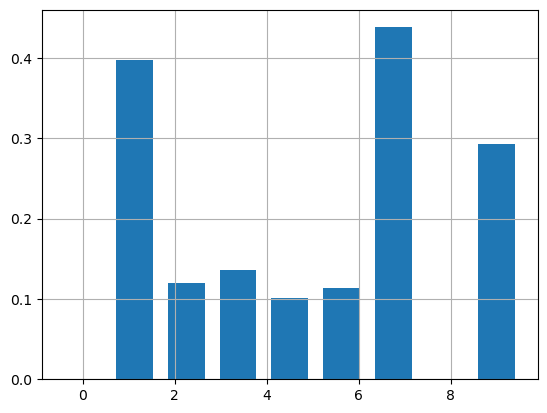

In [1055]:
#THE Y-AXIS IS THE PERCENTAGE OF HOW MUCH WE INVEST IN THE RISKLESS ASSET 
#Plot for turnover in amount invsted in risky/riskless asset
fig = plt.figure()
x = np.linspace(0,9,9)
plt.bar(x,x_turnover)
plt.grid()
plt.savefig("tobinturnover.png")
plt.show()

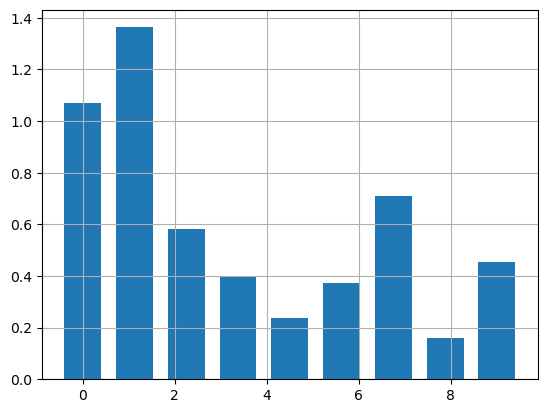

In [1056]:
#THE Y-AXIS IS THE PERCENTAGE CHANGE OF WEIGHT ALLOCATION IN OUR PORTFOLIO - THUS THE RISKY ASSETS
#Plot for turnover within weights in the portfolio
fig = plt.figure()
x = np.linspace(0,9,9)
plt.bar(x,weights_turnover)
plt.grid()
plt.savefig("weightsturnover.png")
plt.show()

# Getting Beta coefficients for each rolling window